In [ ]:
import logging
import pandas as pd
import numpy as np
from numpy import random
import gensim
import nltk
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer
from sklearn.metrics import accuracy_score, confusion_matrix
import matplotlib.pyplot as plt
import re
from keras.preprocessing.text import Tokenizer
from keras.preprocessing.sequence import pad_sequences
from keras.models import Sequential
from keras.layers import LSTM, Dense, Embedding, SpatialDropout1D, Dropout
from keras.utils.np_utils import to_categorical
from keras.utils import plot_model
from keras.callbacks import EarlyStopping
from keras.optimizers import Adam
%matplotlib inline


In [ ]:
df = pd.read_csv('/content/drive/MyDrive/Assignment/text-classification/dataset.csv', encoding='UTF-8')
print(df.head(10))

                                                Text Polarity  Unnamed: 2
0  প্রকৃতি প্রেমী মানুষটি তার দোকানের নাম দিয়েছে...  Positive        NaN
1                     নিঃশ্বাস জানান দিচ্ছে বেচে আছি   Neutral        NaN
2  আপনাদেদ ভিডিও গুলো দেখে নতুন নতুন অনেক কিছু শে...  Positive        NaN
3                  আপু আমি বানাইছি অনেক মজা হইছে....  Positive        NaN
4                ছোট্ট পরীর আগমনে আমরাও খুব আনন্দিত।  Positive        NaN
5  প্রিয় সাকিব ভাই ও তার বাবুদের নেক হায়াত কামনা ...  Positive        NaN
6  কারা যেন বলছিল সাকিব দেশে আসলে করোনা নেগেটিভ হ...  Negative        NaN
7  যাক এত বছর খালি আম্মু আমারে ই জমিদার বইলা আসছে...  Positive        NaN
8                   দীর্ঘজীবি হোক আপনার পুরো পরিবার।  Positive        NaN
9                    সাকিব দেখছি আমাদের মত নবাবজাদা।  Negative        NaN


In [ ]:
df.drop('Unnamed: 2', axis=1, inplace=True)

In [ ]:
df.head()

,Text,Polarity
0,প্রকৃতি প্রেমী মানুষটি তার দোকানের নাম দিয়েছে...,Positive
1,নিঃশ্বাস জানান দিচ্ছে বেচে আছি,Neutral
2,আপনাদেদ ভিডিও গুলো দেখে নতুন নতুন অনেক কিছু শে...,Positive
3,আপু আমি বানাইছি অনেক মজা হইছে....,Positive
4,ছোট্ট পরীর আগমনে আমরাও খুব আনন্দিত।,Positive


In [ ]:
df.rename(columns={"Text": "Text", "Polarity ": "Polarity"}, inplace=True)

In [ ]:
df.head()

,Text,Polarity
0,প্রকৃতি প্রেমী মানুষটি তার দোকানের নাম দিয়েছে...,Positive
1,নিঃশ্বাস জানান দিচ্ছে বেচে আছি,Neutral
2,আপনাদেদ ভিডিও গুলো দেখে নতুন নতুন অনেক কিছু শে...,Positive
3,আপু আমি বানাইছি অনেক মজা হইছে....,Positive
4,ছোট্ট পরীর আগমনে আমরাও খুব আনন্দিত।,Positive


In [ ]:
df.loc[df['Polarity'] == 'neutral', 'Polarity'] = 'Neutral'
df.loc[df['Polarity'] == 'negative', 'Polarity'] = 'Negative'

In [ ]:
df[df['Polarity'] == 'evenly_voted']

,Text,Polarity
379,দয়া করে এই প্রডাক্টি দ্রুত ডেলিভারি দিন আর না...,evenly_voted
402,"এই সময়ে জেনে-বুঝে, স্টাডি করে স্বল্পমেয়াদে ভাল...",evenly_voted


In [ ]:
df.drop(labels=[379, 402], inplace=True)

In [ ]:
df['Polarity'].value_counts()

Neutral     3179
Positive    3141
Negative    2214
Name: Polarity, dtype: int64

In [ ]:
df['Text'] = df['Text'].astype(str)

In [ ]:
max_fatures = 5000
tokenizer = Tokenizer(num_words=max_fatures, split=' ')
tokenizer.fit_on_texts(df['Text'].values)
X = tokenizer.texts_to_sequences(df['Text'].values)
X = pad_sequences(X)

In [ ]:
X[0]

array([   0,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0,
          0,    0,    0,    0,    0,    0,    0,    0, 2417,   40, 4136,
        135], dtype=int32)

In [ ]:
np.shape(X)

(8537, 23)

In [ ]:
embed_dim = 256
model = Sequential()
model.add(Embedding(max_fatures, embed_dim,input_length = X.shape[1]))
model.add(SpatialDropout1D(0.4))
model.add(LSTM(100, dropout=0.2, recurrent_dropout=0.2))
model.add(Dense(3,activation='softmax'))
model.compile(loss = 'categorical_crossentropy', optimizer='adam',metrics = ['acc'])

In [ ]:
print(model.summary())

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding_1 (Embedding)      (None, 23, 256)           1280000   
_________________________________________________________________
spatial_dropout1d_1 (Spatial (None, 23, 256)           0         
_________________________________________________________________
lstm_1 (LSTM)                (None, 100)               142800    
_________________________________________________________________
dense_1 (Dense)              (None, 3)                 303       
Total params: 1,423,103
Trainable params: 1,423,103
Non-trainable params: 0
_________________________________________________________________
None


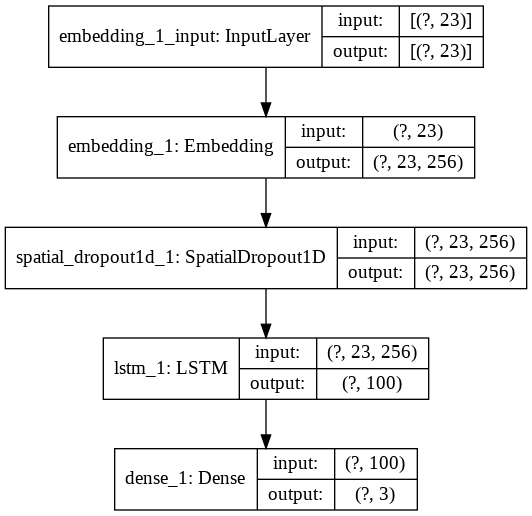

In [ ]:
plot_model(model, to_file='model_plot4a.png', show_shapes=True, show_layer_names=True)

In [ ]:
Y = pd.get_dummies(df['Polarity']).values
X_train, X_test, Y_train, Y_test = train_test_split(X,Y, test_size = 0.20,random_state = 42)
print(X_train.shape,Y_train.shape)
print(X_test.shape,Y_test.shape)

(6829, 23) (6829, 3)
(1708, 23) (1708, 3)


In [ ]:
df['Polarity'].value_counts()

Neutral     3179
Positive    3141
Negative    2214
Name: Polarity, dtype: int64

In [ ]:
history = model.fit(
    X_train, 
    Y_train, 
    epochs = 10, 
    batch_size=64, 
    verbose = 2,
    validation_split=0.1,
    callbacks=[EarlyStopping(monitor='val_loss', patience=3, min_delta=0.0001)]
)

Epoch 1/10
97/97 - 12s - loss: 1.0115 - acc: 0.4769 - val_loss: 0.8877 - val_acc: 0.5725
Epoch 2/10
97/97 - 11s - loss: 0.7058 - acc: 0.6949 - val_loss: 0.7928 - val_acc: 0.6515
Epoch 3/10
97/97 - 11s - loss: 0.4848 - acc: 0.8078 - val_loss: 0.8510 - val_acc: 0.6486
Epoch 4/10
97/97 - 11s - loss: 0.3489 - acc: 0.8690 - val_loss: 0.9583 - val_acc: 0.6735
Epoch 5/10
97/97 - 11s - loss: 0.2678 - acc: 0.9003 - val_loss: 1.1106 - val_acc: 0.6559


In [ ]:
score = model.evaluate(
    X_train, 
    Y_train,
    batch_size=64, 
    verbose=2
)
print('Train loss:', score[0])
print('Train accuracy:', score[1])

107/107 - 2s - loss: 0.2535 - acc: 0.9206
Train loss: 0.2534896433353424
Train accuracy: 0.9206326007843018


In [ ]:
score = model.evaluate(
    X_test, 
    Y_test,
    batch_size=64, 
    verbose=2
)
print('Test loss:', score[0])
print('Test accuracy:', score[1])

27/27 - 0s - loss: 1.2224 - acc: 0.6218
Test loss: 1.222408413887024
Test accuracy: 0.6217798590660095


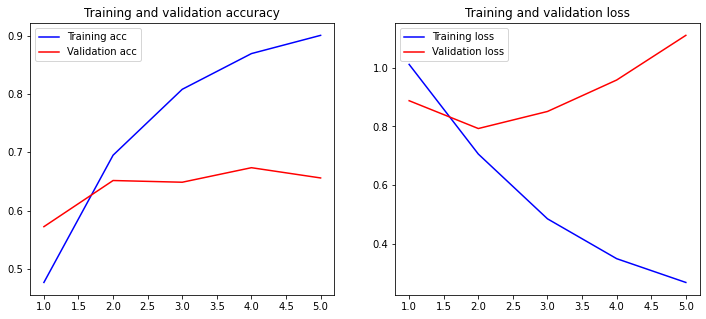

In [ ]:
import matplotlib.pyplot as plt

def plot_history(history):
    acc = history.history['acc']
    val_acc = history.history['val_acc']
    loss = history.history['loss']
    val_loss = history.history['val_loss']
    x = range(1, len(acc) + 1)
    
    plt.figure(figsize=(12, 5))
    plt.subplot(1, 2, 1)
    plt.plot(x, acc, 'b', label='Training acc')
    plt.plot(x, val_acc, 'r', label='Validation acc')
    plt.title('Training and validation accuracy')
    plt.legend()
    plt.subplot(1, 2, 2)
    plt.plot(x, loss, 'b', label='Training loss')
    plt.plot(x, val_loss, 'r', label='Validation loss')
    plt.title('Training and validation loss')
    plt.legend()
plot_history(history)

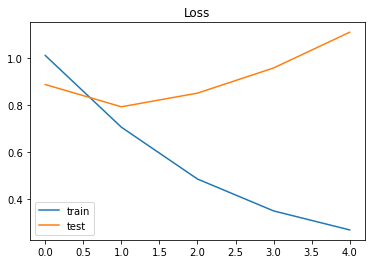

In [ ]:
plt.title('Loss')
plt.plot(history.history['loss'], label='train')
plt.plot(history.history['val_loss'], label='test')
plt.legend()
plt.show();

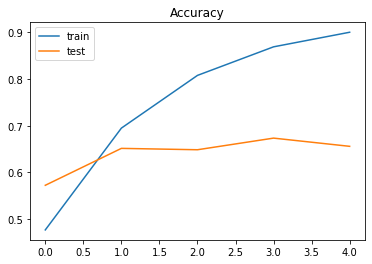

In [ ]:
plt.title('Accuracy')
plt.plot(history.history['acc'], label='train')
plt.plot(history.history['val_acc'], label='test')
plt.legend()
plt.show();

In [ ]:
embed_dim = 128
model = Sequential()
model.add(Embedding(max_fatures, embed_dim,input_length = X.shape[1]))
model.add(SpatialDropout1D(0.4))
model.add(LSTM(64, dropout=0.2, recurrent_dropout=0.2))
model.add(Dense(3,activation='softmax'))
model.compile(loss = 'categorical_crossentropy', optimizer='adam',metrics = ['acc'])

In [ ]:
print(model.summary())

Model: "sequential_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding_2 (Embedding)      (None, 23, 128)           640000    
_________________________________________________________________
spatial_dropout1d_2 (Spatial (None, 23, 128)           0         
_________________________________________________________________
lstm_2 (LSTM)                (None, 64)                49408     
_________________________________________________________________
dense_2 (Dense)              (None, 3)                 195       
Total params: 689,603
Trainable params: 689,603
Non-trainable params: 0
_________________________________________________________________
None


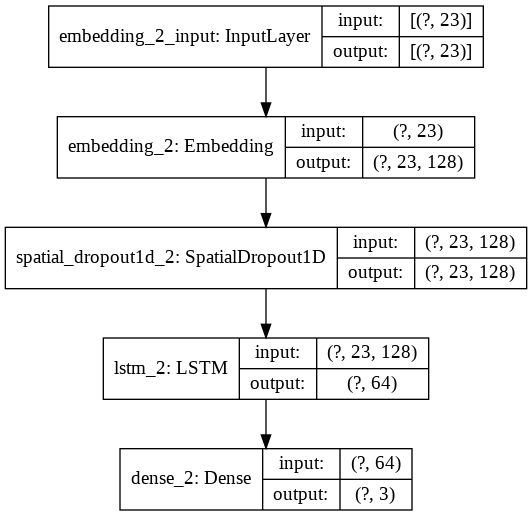

In [ ]:
plot_model(model, to_file='model2_plot4a.png', show_shapes=True, show_layer_names=True)

In [ ]:
history = model.fit(
    X_train, 
    Y_train, 
    epochs = 10, 
    batch_size=64, 
    verbose = 2,
    validation_split=0.1,
    callbacks=[EarlyStopping(monitor='val_loss', patience=3, min_delta=0.0001)]
)

Epoch 1/10
97/97 - 5s - loss: 1.0389 - acc: 0.4579 - val_loss: 0.9353 - val_acc: 0.5608
Epoch 2/10
97/97 - 5s - loss: 0.7955 - acc: 0.6362 - val_loss: 0.8368 - val_acc: 0.6208
Epoch 3/10
97/97 - 5s - loss: 0.5751 - acc: 0.7677 - val_loss: 0.8377 - val_acc: 0.6398
Epoch 4/10
97/97 - 5s - loss: 0.4222 - acc: 0.8379 - val_loss: 0.9243 - val_acc: 0.6471
Epoch 5/10
97/97 - 5s - loss: 0.3378 - acc: 0.8729 - val_loss: 1.0252 - val_acc: 0.6428


In [ ]:
score = model.evaluate(
    X_train, 
    Y_train,
    batch_size=64, 
    verbose=2
)
print('Train loss:', score[0])
print('Train accuracy:', score[1])

107/107 - 1s - loss: 0.2961 - acc: 0.8969
Train loss: 0.2960614264011383
Train accuracy: 0.8969102501869202


In [ ]:
score = model.evaluate(
    X_test, 
    Y_test,
    batch_size=64, 
    verbose=2
)
print('Test loss:', score[0])
print('Test accuracy:', score[1])

27/27 - 0s - loss: 1.1019 - acc: 0.6288
Test loss: 1.1019099950790405
Test accuracy: 0.6288056373596191


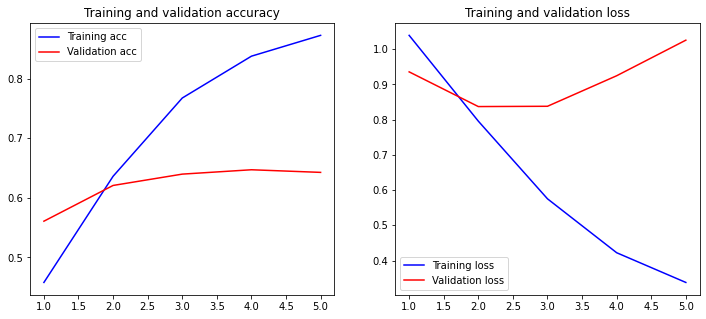

In [ ]:
import matplotlib.pyplot as plt

def plot_history(history):
    acc = history.history['acc']
    val_acc = history.history['val_acc']
    loss = history.history['loss']
    val_loss = history.history['val_loss']
    x = range(1, len(acc) + 1)
    
    plt.figure(figsize=(12, 5))
    plt.subplot(1, 2, 1)
    plt.plot(x, acc, 'b', label='Training acc')
    plt.plot(x, val_acc, 'r', label='Validation acc')
    plt.title('Training and validation accuracy')
    plt.legend()
    plt.subplot(1, 2, 2)
    plt.plot(x, loss, 'b', label='Training loss')
    plt.plot(x, val_loss, 'r', label='Validation loss')
    plt.title('Training and validation loss')
    plt.legend()
plot_history(history)